In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# LDA on Wine dataset
http://www.thejavageek.com/2018/04/30/linear-discriminant-analysis-using-python/

Wine dataset description

The attributes are
- Alcohol 
- Malic acid 
- Ash 
- Alcalinity of ash 
- Magnesium 
- Total phenols 
- Flavanoids 
- Nonflavanoid phenols 
- Proanthocyanins 
- Color intensity 
- Hue 
- OD280/OD315 of diluted wines 
- Proline 

In [3]:
# Linear Discriminant Analysis
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
X_train.shape
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
X_train.shape
X_test.shape
lda.explained_variance_ratio_
lda.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]], dtype=int64)

(142, 13)

(142, 2)

(36, 2)

array([ 0.68723957,  0.31276043])

array([[ 2.29359572,  0.22741082,  1.52864111, -2.70752342,  0.14422738,
        -1.61050896,  4.95049748,  0.31520794, -0.63603985, -2.07225812,
         0.35628851,  2.87225066,  5.10142445],
       [-1.34778511, -1.0145076 , -1.66157263,  1.20511002,  0.16809088,
         0.27093614,  1.11164988,  0.40835858,  0.35139194, -1.54511387,
         0.5917885 , -0.17152363, -2.42938493],
       [-0.64205824,  1.24635779,  0.70724006,  1.33185058, -0.41639751,
         1.4553489 , -7.36533537, -0.97100397,  0.21130924,  4.68892871,
        -1.29119784, -3.05904895, -2.27332756]])

In [9]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]], dtype=int64)

# LDA from Scikit Learn on Iris dataset
#Another example from https://chrisalbon.com/machine_learning/feature_engineering/lda_for_dimensionality_reduction/

In [15]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)
# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])
## View the ratio of explained variance
lda.explained_variance_ratio_

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size = 0.2, random_state = 1)
X_train.shape
X_test.shape
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

Original number of features: 4
Reduced number of features: 1


array([ 0.99147248])

(120, 1)

(30, 1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([[11,  0,  0],
       [ 0, 10,  3],
       [ 0,  0,  6]], dtype=int64)

# LDA on Iris dataset from scratch
#https://sebastianraschka.com/Articles/2014_python_lda.html

In [19]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y=y+1
y
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [20]:
#LDA in 5 steps
#Step 1: Computing the d-dimensional mean vectors
import numpy as np
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))   

Mean Vector class 1: [ 5.006  3.418  1.464  0.244]

Mean Vector class 2: [ 5.936  2.77   4.26   1.326]

Mean Vector class 3: [ 6.588  2.974  5.552  2.026]



In [23]:
#Step 2: Computing the Scatter Matrices
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    print('within-class Scatter Matrix for class', cl, ':\n', class_sc_mat)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix S_W:\n', S_W)

within-class Scatter Matrix for class 1 :
 [[ 6.0882  4.9146  0.7908  0.5168]
 [ 4.9146  7.1138  0.5724  0.5604]
 [ 0.7908  0.5724  1.4752  0.2792]
 [ 0.5168  0.5604  0.2792  0.5632]]
within-class Scatter Matrix for class 2 :
 [[ 13.0552   4.174    8.962    2.7332]
 [  4.174    4.825    4.05     2.019 ]
 [  8.962    4.05    10.82     3.582 ]
 [  2.7332   2.019    3.582    1.9162]]
within-class Scatter Matrix for class 3 :
 [[ 19.8128   4.5944  14.8612   2.4056]
 [  4.5944   5.0962   3.4976   2.3338]
 [ 14.8612   3.4976  14.9248   2.3924]
 [  2.4056   2.3338   2.3924   3.6962]]
within-class Scatter Matrix S_W:
 [[ 38.9562  13.683   24.614    5.6556]
 [ 13.683   17.035    8.12     4.9132]
 [ 24.614    8.12    27.22     6.2536]
 [  5.6556   4.9132   6.2536   6.1756]]


In [25]:
overall_mean = np.mean(X, axis=0)
overall_mean

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix S_B:\n', S_B)

array([ 5.8433,  3.054 ,  3.7587,  1.1987])

between-class Scatter Matrix S_B:
 [[  63.2121  -19.534   165.1647   71.3631]
 [ -19.534    10.9776  -56.0552  -22.4924]
 [ 165.1647  -56.0552  436.6437  186.9081]
 [  71.3631  -22.4924  186.9081   80.6041]]


In [27]:
#Step 3: Solving the generalized eigenvalue problem for the matrix inv(S_W)S_B
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))



Eigenvector 1: 
[[-0.2049]
 [-0.3871]
 [ 0.5465]
 [ 0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[ 0.6104]
 [-0.3325]
 [-0.3415]
 [ 0.1585]]
Eigenvalue 3: 1.48e-15

Eigenvector 4: 
[[ 0.6104]
 [-0.3325]
 [-0.3415]
 [ 0.1585]]
Eigenvalue 4: 1.48e-15


In [28]:
#Checking the eigenvector-eigenvalue calculation
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [29]:
#Step 4: Selecting linear discriminants for the new feature subspace
#4.1. Sorting the eigenvectors by decreasing eigenvalues
#Remember from the introduction that we are not only interested in merely projecting 
#the data into a subspace that improves the class separability, but also reduces the
#dimensionality of our feature space, (where the eigenvectors will form the axes
#of this new feature subspace).

#the eigenvectors with the lowest eigenvalues bear the least information about the
#distribution of the data, and those are the ones we want to drop.

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.2719577997
0.27756686384
6.61354372148e-15
6.61354372148e-15


In [30]:
#If we take a look at the eigenvalues, we can already see that 2 eigenvalues are close to 0. 
#The reason why these are close to 0 is not that they are not informative but it’s due to 
#floating-point imprecision. In fact, these two last eigenvalues should be exactly zero: 
#In LDA, the number of linear discriminants is at most c−1 where c is the number of class 
#labels, since the in-between scatter matrix SB is the sum of c matrices with rank 1 or less.

print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [31]:
#4.2. Choosing k eigenvectors with the largest eigenvalues
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]


In [32]:
#Step 5: Transforming the samples onto the new subspace
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."


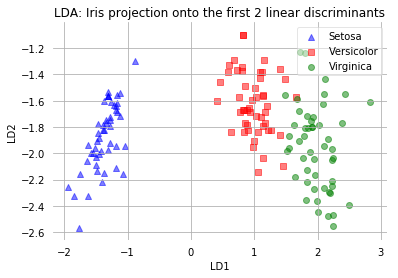

In [40]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [41]:
#A comparison of PCA and LDA
#PCA finds the axes with maximum variance for the whole data set
#where LDA tries to find the axes for best class seperability. 

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

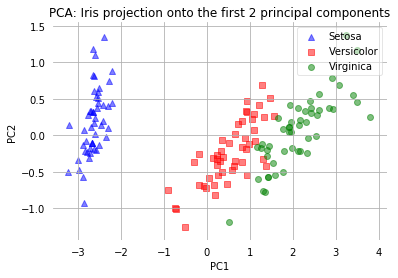

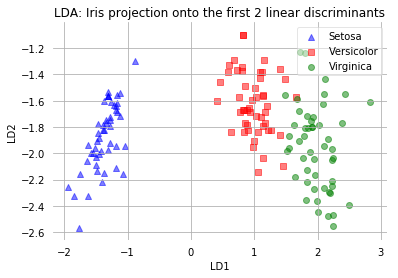

In [42]:
plot_pca()
plot_step_lda()

In [ ]:
Extra

In [44]:
#Where the PCA accounts for the most variance in the whole dataset, 
#the LDA gives us the axes that account for the most variance between the individual classes.

In [45]:
#LDA via scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [46]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

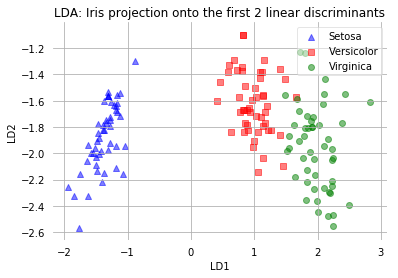

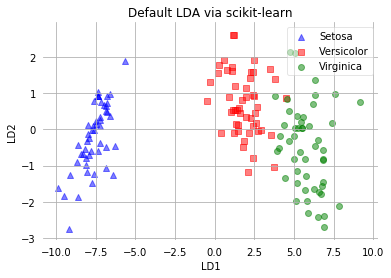

In [47]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [48]:
#I wanted to clarify that feature scaling such as [standardization] 
#does not change the overall results of an LDA and thus may be optional.
#Yes, the scatter matrices will be different depending on whether the 
#features were scaled or not. In addition, the eigenvectors will be different 
#as well. However, the important part is that the eigenvalues will be 
#exactly the same as well as the final projects – the only difference 
#you’ll notice is the scaling of the component axes. 